# TP1 Prétraitement acoustique et Analyse en Composantes Principales

Déposer le notebook sur moodle à la fin de la séance. 

In [34]:
import numpy as np
import scipy as sp
import scipy.io.wavfile as wav
from canaux24 import canaux
from scipy import linalg
import matplotlib.pyplot as plt
import os

### Prétraitements élémentaires
Définition de la fonction lecture qui permet de récupérer la matrice des observations.

 ### Traitements : 
 ATTENTION 
 Procéder par étape en écrivant le code dans une cellule et en traçant le résultat dans la cellule suivante 
 Affichage des matices, des vecteurs, de leur taille ceci afin de vérifier la cohérence des résultats. 
 

In [35]:
# Définition de la fonction lecture
def lecture(voy, n):
    liste_fichiers = []
    for i in range(n):    
        
        #Formatage des différents cas du nom de fichier
        if i < 10 :
            nom_fichier = f'{voy}0{i}.wav'
        else:
            nom_fichier = f'{voy}{i}.wav' 
            
        #Lecture des fichiers + mise en forme
        (Fe, Signal) = wav.read(f'voyelles/Signal/{nom_fichier}')
        liste_fichiers.append(canaux(Signal/((2**15)-1)))
        
    return np.array(liste_fichiers)

In [36]:
# Lecture des 20 fichiers pour chacune des classes
obsaa = lecture('aa', 20)
obsuu = lecture('uu', 20)
obsii = lecture('ii', 20)

In [37]:
# Créer une matrice contenant l'ensemble des observations à traiter
R = np.vstack((obsaa, obsuu, obsii))
print(np.shape(R))

(60, 24)


In [38]:
# En utilisant les fonctions cov et eig, constituer une matrice de passage qui permette de passer 
# de l'espace de dimension 24 généré par la fonction canaux dans un espace à deux dimensions 
# correspondant aux deux composantes principales.

In [39]:
# Pour cela, 
# 1 - rechercher les deux valeurs propres maximales
#On calcule la matrice de covariance à partir de la transposée de la matrice d'observation
mat_cov = np.cov(np.transpose(R))

#On récupère les valeurs propres et les vecteurs propres de la matrice de covariance
[valP, vecP] = sp.linalg.eig(mat_cov)
print(valP)

[4.93217080e+03+0.j 4.33528567e+02+0.j 1.96450490e+02+0.j
 1.77962420e+02+0.j 5.71643508e+01+0.j 5.57290664e+01+0.j
 3.34012156e+01+0.j 2.42534368e+01+0.j 1.81518382e+01+0.j
 7.90947972e+00+0.j 5.85263945e+00+0.j 4.38224486e+00+0.j
 4.08204186e+00+0.j 2.90764469e+00+0.j 2.10226424e+00+0.j
 1.51986650e+00+0.j 1.27597059e+00+0.j 8.36880254e-01+0.j
 4.88797312e-02+0.j 4.08718756e-01+0.j 3.45803981e-01+0.j
 2.76193632e-01+0.j 1.80024365e-01+0.j 1.58626347e-01+0.j]


In [40]:
# 2-  prendre les vecteurs propres correspondants
#En affichant la matrice des valeurs propres, on se rend compte que les valeurs propres maximales sont en indice 0
#et 1. On choisit donc de créer le vecteur W à partir des deux premières colonnes de la matrice des vecteurs propres
vec1 = vecP[:,0]
vec2 = vecP[:,1]
W = np.transpose([vec1,vec2])
print(W)
print(np.shape(W))

[[-0.00458259 -0.00058769]
 [-0.15578644 -0.21506731]
 [-0.30206804  0.02235877]
 [ 0.00470355 -0.01648962]
 [-0.09914572 -0.30043904]
 [ 0.03923348 -0.22386045]
 [ 0.30090203 -0.42624065]
 [ 0.45341451 -0.12461564]
 [ 0.16412496 -0.07845955]
 [ 0.32396571 -0.06436485]
 [ 0.19051029 -0.05232774]
 [ 0.34355022 -0.03020086]
 [ 0.13464805 -0.07054879]
 [ 0.05781014 -0.00277589]
 [ 0.06358828  0.0031752 ]
 [ 0.04630477  0.16162914]
 [ 0.26692953  0.11966159]
 [ 0.38206683  0.06227892]
 [ 0.08733675  0.47478961]
 [ 0.18933515  0.46936577]
 [ 0.01357277  0.32040242]
 [ 0.0364402   0.05623144]
 [ 0.01719676  0.00644725]
 [ 0.0237756   0.02303207]]
(24, 2)


In [41]:
# 3-  projeter R dans ce nouvel espace 
R_new = np.dot(R,W)
print(np.shape(R_new))

(60, 2)


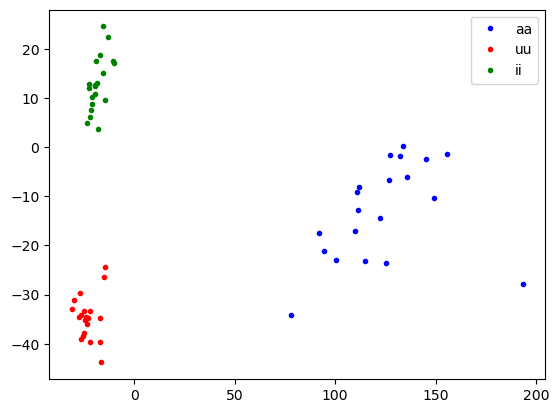

In [42]:
# 4- et effectuer un tracé
# Afficher les nuages de points de chacune des classes de sons sur une même figure en les différenciant 
# par des couleurs ou une forme de tracé de points différentes ; Mettre une légende.
plt.figure()
plt.plot(R_new[0:20,0],R_new[0:20,1],'b.',label="aa")
plt.plot(R_new[20:40,0],R_new[20:40,1],'r.',label="uu")
plt.plot(R_new[40:60,0],R_new[40:60,1],'g.',label="ii")
plt.legend()
plt.show()

In [43]:
# Utilisez les deux vecteurs propres les moins représentatifs pour la matrice de passage, 
# que devient la représentation des nuages ? Est-ce qu'une discrimination linéaire est possible ?

On observe qu'en choisissant les deux vecteurs propres les moins représentatifs, les classes ne sont plus séparées et l'on obtient un nuage de points mélangés, on ne peut donc pas effectuer de discrimination linéaire.

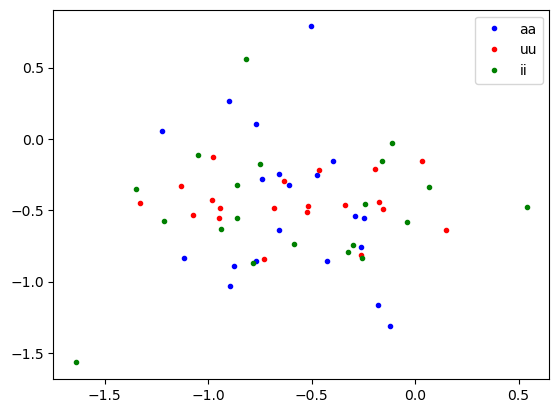

In [44]:
# Pour cela
# 5- rechercher les deux valeurs propres minimales
vec1_bis = vecP[:,22]
vec2_bis = vecP[:,23]
W_bis = np.transpose([vec1_bis,vec2_bis])
R_new_bis = np.dot(R,W_bis)

plt.figure()
plt.plot(R_new_bis[0:20,0],R_new_bis[0:20,1],'b.',label="aa")
plt.plot(R_new_bis[20:40,0],R_new_bis[20:40,1],'r.',label="uu")
plt.plot(R_new_bis[40:60,0],R_new_bis[40:60,1],'g.',label="ii")
plt.legend()
plt.show()

### Généralisation
Réaliser le même traitement avec tous les fichiers (100) des 3 classes. Est-ce toujours séparable ?
Effectuer le même traitement sur les 10 voyelles et commenter les résultats... Ajouter les cellules nécessaires. 

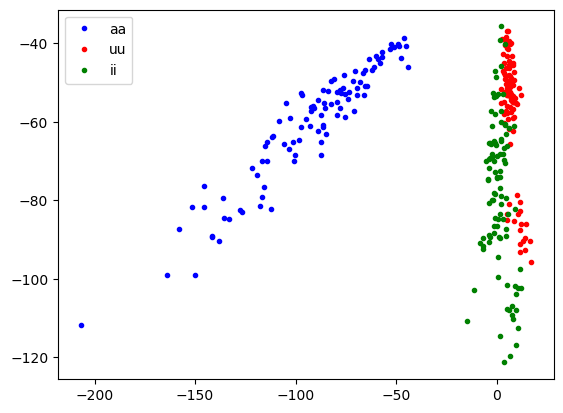

In [45]:
# Lecture des 100 fichiers pour chacune des classes
#On réutilise le code des questions précédentes appliqué à 100 fichiers
obsaa = lecture('aa', 100)
obsuu = lecture('uu', 100)
obsii = lecture('ii', 100)

R = np.vstack((obsaa, obsuu, obsii))
mat_cov = np.cov(np.transpose(R))
[valP, vecP] = sp.linalg.eig(mat_cov)

vec1 = vecP[:,0]
vec2 = vecP[:,1]
W = np.transpose([vec1,vec2])
R_new = np.dot(R,W)

plt.figure()
plt.plot(R_new[0:100,0],R_new[0:100,1],'b.',label="aa")
plt.plot(R_new[100:200,0],R_new[100:200,1],'r.',label="uu")
plt.plot(R_new[200:300,0],R_new[200:300,1],'g.',label="ii")
plt.legend()
plt.show()

On remarque que la voyelle 'aa' est toujours séparable des deux autres classes de voyelles mais pour les voyelles 'uu' et 'ii' cela devient de plus en plus difficile.

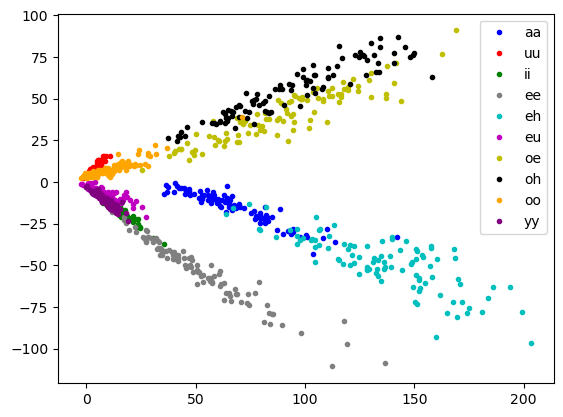

In [46]:
# Lecture des 100 fichiers pour chacune des classes
#On réutilise le code des questions précédentes appliqué à 100 fichiers
obsaa = lecture('aa', 100)
obsuu = lecture('uu', 100)
obsii = lecture('ii', 100)
obsee = lecture('ee', 100)
obseh = lecture('eh', 100)
obseu = lecture('eu', 100)
obsoe = lecture('oe', 100)
obsoh = lecture('oh', 100)
obsoo = lecture('oo', 100)
obsyy = lecture('yy', 100)

R = np.vstack((obsaa, obsuu, obsii, obsee, obseh, obseu, obsoe, obsoh, obsoo, obsyy))
mat_cov = np.cov(np.transpose(R))
[valP, vecP] = sp.linalg.eig(mat_cov)

vec1 = vecP[:,0]
vec2 = vecP[:,1]
W = np.transpose([vec1,vec2])
R_new = np.dot(R,W)

plt.figure()
plt.plot(R_new[0:100,0],R_new[0:100,1],'b.',label="aa")
plt.plot(R_new[100:200,0],R_new[100:200,1],'r.',label="uu")
plt.plot(R_new[200:300,0],R_new[200:300,1],'g.',label="ii")
plt.plot(R_new[300:400,0],R_new[300:400,1],'.',label="ee", c='grey')
plt.plot(R_new[400:500,0],R_new[400:500,1],'c.',label="eh")
plt.plot(R_new[500:600,0],R_new[500:600,1],'m.',label="eu")
plt.plot(R_new[600:700,0],R_new[600:700,1],'y.',label="oe")
plt.plot(R_new[700:800,0],R_new[700:800,1],'k.',label="oh")
plt.plot(R_new[800:900,0],R_new[800:900,1],'.',label="oo",c='orange')
plt.plot(R_new[900:1000,0],R_new[900:1000,1],'g.',label="yy",c='purple')
plt.legend()
plt.show()

Ici en prenant en compte toutes les voyelles on se rend compte qu'il est très difficile de séparer les différentes classes car elles sont assez regroupées et/ou se superposent. Cela est du au fait que certains sons sont très proches phonétiquement.